<a href="https://colab.research.google.com/github/Many98/GLM_R2Py/blob/main/Python/01ZLMA_ex08_Binary_Data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 08 of the course 01ZLMA. 

# GLM for Discrete response - Binary Data Analysis (02)

Alternative and Binomial responses

**Bernoulli (Alternative) Model**

$$Y_{i,j} \sim Be(\pi_i) \ i = 1,\ldots,K \ \text{and} \ j = 1,\ldots, n_i.$$
$K$ is number of groups, $n_i$ is number of observations in group $i$ and $\sum_{i=1}^{K} = N$
$$ E[Y_{i,j}] = \pi_i \ \text{and} \ g(\pi_i) = \eta_i =x_i^T \beta $$


**Binomial Model**
$$Y_i = \sum_{j=1}^{n_i} Y_{i,j} \sim Bi(n_i, \pi_i)$$

**Without continuos covariate (only factor variables)**

$K$ is constant and $n_i \rightarrow \infty $

**With at least one continuos covariate**

$n_i \approx 1$ ( $n_i$ is small enough) and $K \rightarrow \infty$



## Link functions for binary data

**Logistic function:**

The logistic function is the canonical link function for binary responses, and it is CDF of the standard logistic distribution.

$$\pi_i = \frac{1}{1+e^{-x_i^T \beta}} $$ 


**Probit function:**

The CDF of the normal distribution. 
$$\pi_i = \Phi({x_i^T \beta}) $$ 


**Cauchit function:**

The CDF of the Cauchy distribution

$$\pi_i = \frac{1}{\pi}\text{arctan}(x_i^T \beta) + \frac{1}{2} $$ 


**Complementary log-log (cloglog) function:**

The inverse of the conditional log-log function (CDF of the Gumbel distribution)

$$\pi_i = 1 − e^{-e^{x_i^T \beta}}$$

The counter part of the cloglog function is log-log link function.

In [6]:
import numpy as np
import scipy
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot

import pandas as pd

from helpers import DiagnosticPlots ,chisq
from dfply import *  # handy module to mimic R dplyr library



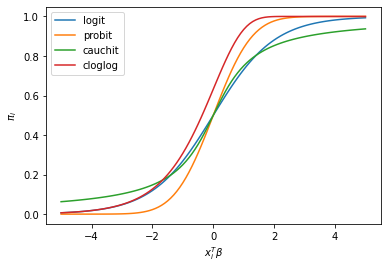

In [2]:
x = np.tile(np.linspace(-5, 5, 101), 4).reshape(4, -1)
y = []
names =[]

for i, j in enumerate(zip(("logit", "probit", "cauchit", "cloglog"), 
                (sm.genmod.families.links.Logit(), sm.genmod.families.links.probit(), 
                 sm.genmod.families.links.cauchy(), sm.genmod.families.links.CLogLog()))):
    
    y.append(j[1].inverse(x[i]))
    names.append([j[0]]*len(x[i]))
    
y = np.array(y).flatten()
n = np.array(names).flatten()

fig, ax = plt.subplots()



sns.lineplot(x='x', y='y', data=pd.DataFrame(data={'x': x.flatten(), 'y': y, 'n': n}), ax=ax, hue='n')
    

ax.legend()
ax.set_xlabel(r'$x_i^T \beta$')
ax.set_ylabel(r'$\pi_i$')
plt.show()

## Logistic regression with Titanic dataset

https://www.kaggle.com/c/titanic/data

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [3]:
X, y = datasets.fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

titanic_train = pd.concat([X_train, y_train], axis=1)
titanic_test = pd.concat([X_test, y_test], axis=1)

In [4]:
titanic_test.describe(include = 'all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,262.000000,262,262,208.000000,262.000000,262.000000,262,262.000000,52,261,98,24.000000,148,262
unique,NaN,262,2,NaN,NaN,NaN,242,NaN,49,3,23,NaN,125,2
top,NaN,"Burns, Miss. Elizabeth Margaret",male,NaN,NaN,NaN,12749,NaN,C78,S,15,NaN,"New York, NY",0
freq,NaN,1,172,NaN,NaN,NaN,3,NaN,2,172,12,NaN,10,162
mean,2.301527,NaN,NaN,29.812901,0.366412,0.354962,NaN,29.939677,NaN,NaN,NaN,202.458333,NaN,NaN
std,0.833171,NaN,NaN,14.491698,0.697078,0.998060,NaN,39.516918,NaN,NaN,NaN,105.135101,NaN,NaN
min,1.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,14.000000,NaN,NaN
25%,2.000000,NaN,NaN,20.750000,0.000000,0.000000,NaN,7.860450,NaN,NaN,NaN,162.750000,NaN,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,13.000000,NaN,NaN,NaN,204.500000,NaN,NaN
75%,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,29.556250,NaN,NaN,NaN,298.250000,NaN,NaN


# Fast and furios solution of the HW from the previous Ex07

Consider a model with continuos variables `age`, `fare`, and any factor variable. 

* Create factor `age`, which takes values 1 (child) and 0 (adult).
* Create factor from varaible `fare` by spliting into 10 groups with approx same number of observations.
* What percentage is the chance of survival lower for adult compare to child? 
* Depends the probability of survival on fare? Test it.
* Assume that the chance of survival increases with exponential increasig fare. How the chance of survival increased if the person spent an extra 10 pound for a ticket? 
* Build a model where the probabilty of survival depends on both `age` and `fare`. Are both covariates significant?
* 

In [80]:
data_HW = titanic_train >> \
  select(titanic_train.survived,titanic_train.age,titanic_train.fare,titanic_train.pclass,titanic_train.sex,
         titanic_train.embarked)

data_HW = data_HW.apply(lambda x: x.astype('category') if str(x.dtype) == 'str' else x) 
print(data_HW.describe(include='all'))
print(data_HW.dtypes)

data_HW = data_HW >> \
            filter_by(data_HW.embarked.isin(('C', 'S', 'Q')) )  >> \
            transmute(survived = data_HW.survived.astype('category'),
                      survived_num = data_HW.survived.astype('float'),
                      age = pd.cut(data_HW.age,(-np.inf, 16, np.inf), labels=["child","adult"]),
                      age_num = data_HW.age,
                      fare = data_HW.fare,
                      fare_quantile = pd.qcut(data_HW.fare, q=8, labels=list(range(1, 9))),
                      fare_quantile2 = pd.qcut(data_HW.fare, q=np.linspace(0, 1, 9)),
                      class_ = data_HW.pclass.astype('category'),
                      sex = data_HW.sex.astype('category'),
                      embarked = data_HW.embarked.astype('category')) 

#data_HW.fare_quantile = pd.factorize(data_HW.fare_quantile)
data_HW = data_HW.dropna(axis=0, how='any')  # `axis=0` stands for per index (row)

       

print(data_HW.describe(include='all'))
print(data_HW.info())


       survived         age         fare       pclass   sex embarked
count      1047  838.000000  1046.000000  1047.000000  1047     1046
unique        2         NaN          NaN          NaN     2        3
top           0         NaN          NaN          NaN  male        S
freq        647         NaN          NaN          NaN   671      742
mean        NaN   29.898071    34.136034     2.293219   NaN      NaN
std         NaN   14.402664    54.378935     0.839388   NaN      NaN
min         NaN    0.333300     0.000000     1.000000   NaN      NaN
25%         NaN   21.000000     7.925000     2.000000   NaN      NaN
50%         NaN   28.000000    14.500000     3.000000   NaN      NaN
75%         NaN   39.000000    31.275000     3.000000   NaN      NaN
max         NaN   80.000000   512.329200     3.000000   NaN      NaN
survived    category
age          float64
fare         float64
pclass       float64
sex         category
embarked    category
dtype: object
       survived  survived_num   

In [ ]:
g = sns.pairplot(data=data_HW, vars=list(data_HW.columns))
#g.map_diag(sns.kdeplot)
#g.map_lower(sns.histplot)  TODO needs implementation

In [41]:
# Simple Logistic Regression model with all discrete covariates fare,sex, agewithout interactions
mod_HW1=smf.glm(formula = 'survived_num~age+sex+fare_quantile2', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod_HW1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           survived_num   No. Observations:                  836
Model:                            GLM   Df Residuals:                      826
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -418.27
Date:                Mon, 05 Sep 2022   Deviance:                       836.53
Time:                        19:38:19   Pearson chi2:                     852.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3000
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      1.3964      0.371      3.762      0.000       0.669       2.124
age[T.adult]                                                  -0.5473      0.251     -2.182      0.029      -1.039      -0.056
sex[T.male]                                                   -2.3664      0.176    -13.407      0.000      -2.712      -2.020
fare_quantile2[T.Interval(7.75, 7.925, closed='right')]       -0.6346      0.390     -1.625      0.104      -1.400       0.131
fare_quantile2[T.Interval(7.925, 10.462, closed='right')]     -0.8467      0.404     -2.094      0.036      -1.639      -0.054
fare_quantile2[T.Interval(10.462, 14.5, closed='right')]      -0.0746      0.340     -0.220      0.826      -0.740       0.591
fare_quantile2[T.Interval(14.5, 25.926, closed='right')]       0.0914      0.368      0.249      0.804      -0.629       0.812
fare_quantile2[T.Interval(25.926, 31.275, closed='right')]     0.1948      0.337      0.578      0.563      -0.465       0.855
fare_quantile2[T.Interval(31.275, 69.55, closed='right')]      0.6294      0.339      1.855      0.064      -0.036       1.294
fare_quantile2[T.Interval(69.55, 512.329, closed='right')]     1.0188      0.342      2.979      0.003       0.349       1.689
==============================================================================================================================
"""

In [32]:
#Function to estimate OR with lower and upper limit of 95% CI for OR

def OR_coef(variable,model,CI):
    param = np.array(model.params)
    where = np.where(np.array(model.params.index) == variable)
    beta = param[where]
    se = np.sqrt(np.diag(model.cov_params().to_numpy()))[where]
    or_ = np.exp(beta)
    
    return pd.DataFrame(index=[variable], data={'OR': or_, 'LCL': np.exp(beta-1*scipy.stats.norm.ppf(CI/2 +0.5)*se)
                                              , 'UCL':np.exp(beta+ scipy.stats.norm.ppf(CI/2 +0.5)*se)})
OR_coef("age[T.adult]",mod_HW1,0.95)

,OR,LCL,UCL
age[T.adult],1.728637,1.057281,2.826291


The chances of drowning were almost twice as high in the group of adults as in the group of children. 

In [42]:
# Check model with factorized Fare
mod_HW0=smf.glm(formula = 'survived_num~age+sex', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
mod_HW1=smf.glm(formula = 'survived_num~age+sex+fare_quantile2', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
mod_HW2=smf.glm(formula = 'survived_num~age+sex+fare', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
mod_HW1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           survived_num   No. Observations:                  836
Model:                            GLM   Df Residuals:                      826
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -418.27
Date:                Mon, 05 Sep 2022   Deviance:                       836.53
Time:                        19:38:54   Pearson chi2:                     852.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3000
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      1.3964      0.371      3.762      0.000       0.669       2.124
age[T.adult]                                                  -0.5473      0.251     -2.182      0.029      -1.039      -0.056
sex[T.male]                                                   -2.3664      0.176    -13.407      0.000      -2.712      -2.020
fare_quantile2[T.Interval(7.75, 7.925, closed='right')]       -0.6346      0.390     -1.625      0.104      -1.400       0.131
fare_quantile2[T.Interval(7.925, 10.462, closed='right')]     -0.8467      0.404     -2.094      0.036      -1.639      -0.054
fare_quantile2[T.Interval(10.462, 14.5, closed='right')]      -0.0746      0.340     -0.220      0.826      -0.740       0.591
fare_quantile2[T.Interval(14.5, 25.926, closed='right')]       0.0914      0.368      0.249      0.804      -0.629       0.812
fare_quantile2[T.Interval(25.926, 31.275, closed='right')]     0.1948      0.337      0.578      0.563      -0.465       0.855
fare_quantile2[T.Interval(31.275, 69.55, closed='right')]      0.6294      0.339      1.855      0.064      -0.036       1.294
fare_quantile2[T.Interval(69.55, 512.329, closed='right')]     1.0188      0.342      2.979      0.003       0.349       1.689
==============================================================================================================================
"""

Yes, covariate `fare` is statisticaly significant in the model. But it's better to test it with Deviation test (LRT) compare to Wald tests from summary() function.

In [43]:
#anova(mod_HW1,mod_HW0,test="Chisq")
chisq(mod_HW0, mod_HW1)
#drop1(mod_HW1,test="Chisq")  # TODO needs implementaion

Estimated Chi2 statistic is: 41.069171090042005 
P-value is: 7.852116113956844e-07 



Confirmed.

In [46]:
# Fare as continuous variable

mod_HW3 = smf.glm(formula = 'survived_num~np.divide(fare, 10)', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
mod_HW4 = smf.glm(formula = 'survived_num~np.divide(fare, 10)+sex+age', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod_HW4.summary())
print(np.exp(mod_HW3.params))
print(np.exp(mod_HW4.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:           survived_num   No. Observations:                  836
Model:                            GLM   Df Residuals:                      832
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -425.75
Date:                Mon, 05 Sep 2022   Deviance:                       851.51
Time:                        19:40:46   Pearson chi2:                     830.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2873
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.3452    

The chance of survival increased by 8.5% with the ticket price 10 pounds higher.

Question: What can you say about Causality? Does a higher price result in a greater chance of survival?



In [47]:
# Model without sex variable
mod_HW5 = smf.glm(formula = 'survived_num~np.divide(fare, 10)+np.divide(age_num, 10)', data=data_HW,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod_HW5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           survived_num   No. Observations:                  836
Model:                            GLM   Df Residuals:                      833
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -534.51
Date:                Mon, 05 Sep 2022   Deviance:                       1069.0
Time:                        19:42:07   Pearson chi2:                     844.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.07556
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.1608      0.169     -0.952      0.341      -0.492       0.170
np.divide(fare, 10)        0.1180      0.019      6.376      0.000       0.082       0.154
np.divide(age_num, 10)    -0.2049      0.053     -3.869      0.000      -0.309      -0.101
==========================================================================================
"""

## Binomial data approach

In [ ]:
#data_HW

In [99]:

data_HW_bin = \
        (data_HW.groupby(by=["sex", "age", "fare_quantile2"], as_index=False)
        .agg(n=('survived_num', 'count'), m=('survived_num', 'sum'))
    
    )

data_HW_bin

,sex,age,fare_quantile2,n,m
0,female,child,"(-0.001, 7.75]",5,5.0
1,female,child,"(7.75, 7.925]",1,0.0
2,female,child,"(7.925, 10.462]",2,1.0
3,female,child,"(10.462, 14.5]",6,4.0
4,female,child,"(14.5, 25.926]",14,10.0
5,female,child,"(25.926, 31.275]",12,6.0
6,female,child,"(31.275, 69.55]",9,8.0
7,female,child,"(69.55, 512.329]",3,2.0
8,female,adult,"(-0.001, 7.75]",19,13.0
9,female,adult,"(7.75, 7.925]",20,7.0


### Some additional questions 

**Estimate** null model and compare obtained probality of survived with estimated probability from survived-not survived ratio.

In [111]:
data_HW_bin['f'] = data_HW_bin['n'] - data_HW_bin['m']
data_HW_bin = sm.add_constant(data_HW_bin)

mod_0 = sm.GLM(endog =data_HW_bin[['m', 'f']], exog=data_HW_bin['const'],
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod_0.summary())


def invlogit(x): return np.exp(x) / (1+np.exp(x)) # inverse logit function

p0_model = invlogit(mod_0.params)

# Probability of survive
p0_stat = data_HW_bin['m'].sum()/data_HW_bin['n'].sum()
print(p0_model,p0_stat)

# Chance of survive
print(np.exp(mod_0.params))
p0_stat/(1-p0_stat)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ['m', 'f']   No. Observations:                   32
Model:                            GLM   Df Residuals:                       31
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -226.46
Date:                Mon, 05 Sep 2022   Deviance:                       368.94
Time:                        20:53:22   Pearson chi2:                     331.
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3430      0.070     -4.887      0.0

0.7096114519427402

Estimate model with one covariate factorized `fare` and compare OR computed directly from estimated regression coefficient with OR compputed from probabilities of survived for each group.

In [121]:
#mod_fare = sm.GLM(endog =data_HW_bin[['m', 'f']], exog=data_HW_bin[['const', 'fare_quantile2']],
#                family=sm.families.Binomial(sm.families.links.Logit())).fit()

#mod_fare = smf.glm('(m,f) ~ fare_quantile2', data=data_HW_bin,
#                family=sm.families.Binomial(sm.families.links.Logit())).fit()

# above are not working
data_HW_bin['p'] = data_HW_bin['m'] / data_HW_bin['n']

mod_fare = smf.glm('p ~ fare_quantile2', data=data_HW_bin, var_weights=data_HW_bin['n'],
              family=sm.families.Binomial(sm.families.links.Logit())).fit()



print(mod_fare.summary())
#mod_fare.summary()
#anova(mod_fare,mod_0,test="Chisq") 
chisq(mod_0, mod_fare)
# Fare price is highly significant in the model.
print(np.exp(mod_fare.params))




                 Generalized Linear Model Regression Results                  
Dep. Variable:                      p   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -406.73
Date:                Mon, 05 Sep 2022   Deviance:                       287.02
Time:                        21:06:57   Pearson chi2:                     267.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9227
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

Question: Assume you spent 25 pounds for a ticket. What is your chance to survive compare to someone who spent only 5 pounds?

In [133]:
# Compute probability of survival:
print(invlogit(mod_fare.params[0]) )
invlogit(mod_fare.params[0]+mod_fare.params[1:]) 


0.31914893617021267


0.6610169491525419

In [135]:
# Check: odds ratio computed by hands.
Pr_1= invlogit(mod_fare.params[0])
Pr_8 = invlogit(mod_fare.params[0] +mod_fare.params[7])

OR_1 = Pr_1/(1-Pr_1)
OR_8 = Pr_8/(1-Pr_8)
print(OR_8/OR_1)

np.exp(mod_fare.params[-1])

4.159999999999994


4.159999999999993

**Estimate saturated model**

If we have  fixed number of parameters,  saturated model obtain every  "observation" and residual deviance of this saturated model is "zero". 


In [136]:


mod_HW_sat = smf.glm('p ~ fare_quantile2*age*sex', data=data_HW_bin, var_weights=data_HW_bin['n'],
              family=sm.families.Binomial(sm.families.links.Logit())).fit()


mod_HW_sat.summary()

/media/emanuel/data/miniconda3/lib/python3.9/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      p   No. Observations:                   32
Model:                            GLM   Df Residuals:                        0
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -263.22
Date:                Mon, 05 Sep 2022   Deviance:                   3.8010e-09
Time:                        21:17:44   Pearson chi2:                 1.90e-09
No. Iterations:                    21   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=======================================================================================================================================================
                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                              22.5661   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(7.75, 7.925, closed='right')]                               -45.1321   5.28e+04     -0.001      0.999   -1.04e+05    1.03e+05
fare_quantile2[T.Interval(7.925, 10.462, closed='right')]                             -22.5661   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
fare_quantile2[T.Interval(10.462, 14.5, closed='right')]                              -21.8729   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
fare_quantile2[T.Interval(14.5, 25.926, closed='right')]                              -21.6498   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
fare_quantile2[T.Interval(25.926, 31.275, closed='right')]                            -22.5661   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
fare_quantile2[T.Interval(31.275, 69.55, closed='right')]                             -20.4866   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
fare_quantile2[T.Interval(69.55, 512.329, closed='right')]                            -21.8729   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
age[T.adult]                                                                          -21.7929   2.16e+04     -0.001      0.999   -4.23e+04    4.22e+04
sex[T.male]                                                                         -2.124e-09   5.28e+04  -4.02e-14      1.000   -1.03e+05    1.03e+05
fare_quantile2[T.Interval(7.75, 7.925, closed='right')]:age[T.adult]                   43.7399   5.28e+04      0.001      0.999   -1.03e+05    1.04e+05
fare_quantile2[T.Interval(7.925, 10.462, closed='right')]:age[T.adult]                 20.9174   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(10.462, 14.5, closed='right')]:age[T.adult]                  22.0340   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(14.5, 25.926, closed='right')]:age[T.adult]                  22.0160   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(25.926, 31.275, closed='right')]:age[T.adult]                23.1792   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(31.275, 69.55, closed='right')]:age[T.adult]                 21.9107   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(69.55, 512.329, closed='right')]:age[T.adult]                24.5337   2.16e+04      0.001      0.999   -4.22e+04    4.23e+04
fare_quantile2[T.Interval(7.75, 7.925, clos


We can test other models against saturated one.

In [137]:


mod_HW_bin1 = smf.glm('p ~ fare_quantile2+age+sex', data=data_HW_bin, var_weights=data_HW_bin['n'],
              family=sm.families.Binomial(sm.families.links.Logit())).fit()


mod_HW_bin1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      p   No. Observations:                   32
Model:                            GLM   Df Residuals:                       22
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -298.60
Date:                Mon, 05 Sep 2022   Deviance:                       70.769
Time:                        21:18:48   Pearson chi2:                     73.4
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      1.3964      0.371      3.762      0.000       0.669       2.124
fare_quantile2[T.Interval(7.75, 7.925, closed='right')]       -0.6346      0.390     -1.625      0.104      -1.400       0.131
fare_quantile2[T.Interval(7.925, 10.462, closed='right')]     -0.8467      0.404     -2.094      0.036      -1.639      -0.054
fare_quantile2[T.Interval(10.462, 14.5, closed='right')]      -0.0746      0.340     -0.220      0.826      -0.740       0.591
fare_quantile2[T.Interval(14.5, 25.926, closed='right')]       0.0914      0.368      0.249      0.804      -0.629       0.812
fare_quantile2[T.Interval(25.926, 31.275, closed='right')]     0.1948      0.337      0.578      0.563      -0.465       0.855
fare_quantile2[T.Interval(31.275, 69.55, closed='right')]      0.6294      0.339      1.855      0.064      -0.036       1.294
fare_quantile2[T.Interval(69.55, 512.329, closed='right')]     1.0188      0.342      2.979      0.003       0.349       1.689
age[T.adult]                                                  -0.5473      0.251     -2.182      0.029      -1.039      -0.056
sex[T.male]                                                   -2.3664      0.176    -13.407      0.000      -2.712      -2.020
==============================================================================================================================
"""

In [138]:
#drop1(mod_HW_sat, test="Chisq")
#anova(mod_HW_sat,mod_HW_bin1, test="Chisq")
chisq(mod_HW_bin1, mod_HW_sat)


Estimated Chi2 statistic is: 70.76903279142763 
P-value is: 5.003135125154948e-07 



## Question:
* How do you interpret previous result?
* Is simplier aditive model without interactions good enough?

## Residual analysis

In [140]:
# start with simple model


mod_1 = smf.glm('survived_num ~ age_num+sex+class_', data=data_HW, 
              family=sm.families.Binomial(sm.families.links.Logit())).fit()


mod_1.summary()

#mod_1 = smf.glm('survived_num ~dare+sex+', data=data_HW_bin, 
#              family=sm.families.Binomial(sm.families.links.Logit())).fit()
#mod_1.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           survived_num   No. Observations:                  836
Model:                            GLM   Df Residuals:                      831
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -395.24
Date:                Mon, 05 Sep 2022   Deviance:                       790.48
Time:                        21:21:29   Pearson chi2:                     869.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3375
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.5696      0.365      9.787      0.000       2.855       4.284
sex[T.male]      -2.5088      0.185    -13.548      0.000      -2.872      -2.146
class_[T.2.0]    -1.1589      0.251     -4.609      0.000      -1.652      -0.666
class_[T.3.0]    -2.2293      0.251     -8.877      0.000      -2.722      -1.737
age_num          -0.0375      0.007     -5.319      0.000      -0.051      -0.024
=================================================================================
"""

In [142]:
res_resp = mod_1.resid_response 
res_work = mod_1.resid_working 
res_pear = mod_1.resid_pearson 
res_deviance = mod_1.resid_deviance

#print(res_resp,res_work,res_pear, res_deviance)

175    -0.383304
655    -0.085673
278     0.534522
1158   -0.451133
139     0.198413
          ...   
481     0.169901
87      0.487741
965    -0.112257
252    -0.227064
215    -0.247395
Length: 836, dtype: float64 175    -1.621545
655    -1.093700
278     2.148331
1158   -1.821935
139     1.247525
          ...   
481     1.204676
87      1.952138
965    -1.126453
252    -1.293768
215    -1.328719
Length: 836, dtype: float64 175    -0.788381
655    -0.306105
278     1.071602
1158   -0.906606
139     0.497518
          ...   
481     0.452411
87      0.975776
965    -0.355602
252    -0.542004
215    -0.573340
Length: 836, dtype: float64 175    -0.983239
655    -0.423242
278     1.236682
1158   -1.095353
139     0.665073
          ...   
481     0.610263
87      1.156655
965    -0.488003
252    -0.717717
215    -0.753943
Length: 836, dtype: float64


A perfect fit of a datapoint (which never occurs) gives a deviance of zero as "log(1) =0". A poorly fitting point has a large residual deviance.

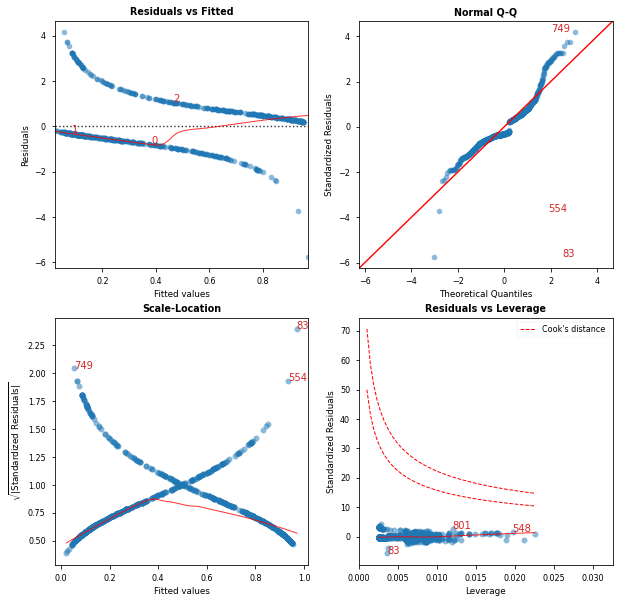

        Features  VIF Factor
1    sex[T.male]        1.04
4        age_num        1.23
2  class_[T.2.0]        1.52
3  class_[T.3.0]        1.77
0      Intercept       12.91


In [143]:
cls = DiagnosticPlots(mod_1)
fig, ax = cls()

All plots look funny. What do you think, is there any problem in the model?


* The **Residuals vs Fitted** plot can help you see, for example, if there are curvilinear trends that you missed. But the fit of a logistic regression is curvilinear by nature, so you can have odd looking trends in the residuals with nothing amiss.
* The **Normal Q-Q** plot helps you detect if your residuals are normally distributed. But the deviance residuals don't have to be normally distributed for the model to be valid, so the normality / non-normality of the residuals doesn't necessarily tell you anything.
* The **Scale-Location** plot can help you identify heteroscedasticity. But logistic regression models are pretty much heteroscedastic by nature.
* The **Residuals vs Leverage** can help you identify possible outliers. But outliers in logistic regression don't necessarily manifest in the same way as in linear regression, so this plot may or may not be helpful in identifying them.

source:https://stats.stackexchange.com/questions/121490/interpretation-of-plot-glm-model


<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

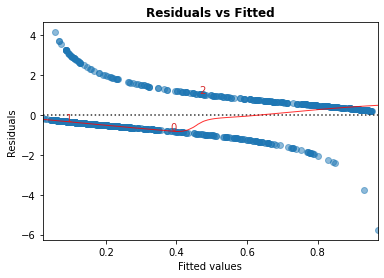

In [144]:
cls.residual_plot()

In [ ]:
plot(data_HW$age_num,residuals(mod_1),col=c("blue","red")[1+data_HW$survived_num])
lines(lowess(data_HW$age_num,residuals(mod_1)),col="black",lwd=2)
lines(lowess(data_HW$age_num[data_HW$survived_num==0],residuals(mod_1)[data_HW$survived_num==0]),col="blue")
lines(lowess(data_HW$age_num[data_HW$survived_num==1],residuals(mod_1)[data_HW$survived_num==1]),col="red")
abline(h=0,lty=2,col="grey")

In [ ]:
data_HW_mod = data_HW %>%
  mutate(fitted = mod_1$fitted.values,
         #fitted = predict(mod_1, newdata = data_HW, type = "response"),
         predict = as.factor(ifelse(fitted > 0.5, "1", "0")),
         r_deviance_std =rstandard(mod_1, type = "deviance"),
         r_pearson_std = rstandard(mod_1, type = "pearson") )
head(data_HW_mod)

In [ ]:
library(ggplot2)
install.packages("gridExtra")
library(gridExtra)

p1 = ggplot(data_HW_mod, aes(x = age_num,y = fitted, color = sex, shape = class)) + 
      geom_point() 
p2 = ggplot(data_HW_mod, aes(x = age_num,y = r_deviance_std, color = sex, shape = class)) + 
      geom_point() 
grid.arrange(p1, p2, nrow = 1)

In [ ]:
p1 = ggplot(data_HW_mod, aes(x = age_num,y = fitted, color = survived)) + 
      geom_point() 
p2 = ggplot(data_HW_mod, aes(x = age_num,y = r_deviance_std, color = survived)) + 
      geom_point() 
grid.arrange(p1, p2, nrow = 1)

## Post hoc analysis by quality of fitted values

In [ ]:
# Fit a  model
table(data_HW_mod$predict, data_HW$survived)

In [ ]:
install.packages("caret")
library(caret)
install.packages("e1071")
library(e1071)
install.packages("tidymodels")
library(tidymodels)
 

In [ ]:
confusionMatrix(data_HW_mod$predict, data_HW_mod$survived, positive = "1")

In [ ]:
ggplot(data_HW_mod, aes(x=fitted, color=survived)) +
  geom_histogram(fill="white",aes(y=..density..), alpha=0.1, position="identity") +
   geom_density(aes(y=..density..))

# Overlaid histograms
#ggplot(df, aes(x=weight, color=sex)) +
#  geom_histogram(fill="white", alpha=0.5, position="identity")

In [ ]:
data_HW_mod = data_HW_mod %>%
  mutate(predict_04 = as.factor(ifelse(fitted > 0.4, "1", "0")) )
head(data_HW_mod)
confusionMatrix(data_HW_mod$predict_04, data_HW_mod$survived, positive = "1")

In [ ]:
(332+232)/(332 + 55 + + 86 + 232) # Accuracy from Confusion Matrix

## Use test data

In [ ]:
titanic_test.head()

In [ ]:
data_test = titanic_test %>%
  dplyr::select(Age,Fare,Pclass,Sex,Embarked) %>%
  filter(Embarked %in% c("C","Q","S")) %>%
  drop_na %>%
  transmute(age  = cut(Age, breaks=c(-Inf, 16, Inf), labels=c("child","adult")),
            age_num = Age,
            fare = Fare,
            fare_quantile = ntile(Fare, 8),
            fare_quantile2 = cut(Fare, quantile(Fare, prob = seq(0,1,length = 9), type = 8)), 
            class = as.factor(Pclass),
            sex = as.factor(Sex),
            embarked = as.factor(Embarked)) %>%
  drop_na 
  summary(data_test)

In [ ]:
## Plot train

data_test = data_test %>%
  mutate(fitted = predict(mod_1, newdata = data_test, type = "response"),
         predict = as.factor(ifelse(fitted > 0.5, "1", "0")) ) %>%
         arrange(age_num)
head(data_test)


plt = ggplot(data_test, aes(x = age_num, y = fitted, colour = sex:class)) +
    geom_line() +
    geom_rug(aes(y = survived_num, colour = survived), data = data_HW_mod) +
    #scale_colour_discrete(name = 'Survived') +
    labs(x = 'Age', y = 'Probability of survived')
plt



In [ ]:
data_test_select = data_test %>%
  dplyr::filter(sex == "male",
               class == "2")

plt = ggplot(data_test_select, aes(x = age_num, y = fitted)) +
    geom_line() +
    geom_rug(aes(y = survived_num, colour = survived), data = data_HW_mod) +
    #scale_colour_discrete(name = 'Survived') +
    labs(x = 'Age', y = 'Probability of survived')
plt


Wrong way to plot confidence interval

In [ ]:
#plt = ggplot(data_test, aes(x = age_num, y = fitted, colour = sex:class)) +
#    geom_line() +
#    geom_rug(aes(y = survived_num, colour = survived), data = data_HW_mod) +
#    #scale_colour_discrete(name = 'Survived') +
#    labs(x = 'Age', y = 'Probability of survived')
#plt

In [ ]:
## add standard errors and compute a 95% interval the wrong way
data_test_select = data_test_select %>%
  mutate(wrong_se = predict(mod_1, newdata = data_test_select, type = 'response',se.fit = TRUE)$se.fit,
         wrong_upr = fitted + (2 * wrong_se),
         wrong_lwr = fitted - (2 * wrong_se))

plt + geom_ribbon(data = data_test_select, aes(ymin = wrong_lwr, ymax = wrong_upr),
                  alpha = 0.1)




Right way

In [ ]:
#predict(mod_1, data_test_select, se.fit = TRUE)


In [ ]:
ilink = family(mod_1)$linkinv
quant_t = qt(0.025, df = df.residual(mod_1), lower.tail = FALSE)
quant_n = qnorm(0.005, lower.tail = FALSE)
## add fit and se.fit on the **link** scale
data_test_select = data_test_select %>%
   mutate(fit_link = predict(mod_1, data_test_select, se.fit = TRUE)$fit,
          se_link  = predict(mod_1, data_test_select, se.fit = TRUE)$se.fit,
          fit  = ilink(fit_link),
          fit_ul = ilink(fit_link + (quant_n * se_link)),
          fit_ll = ilink(fit_link - (quant_n * se_link)))
## show
head(data_test_select)

plt + geom_ribbon(data = data_test_select,
                  aes(ymin = fit_ll, ymax = fit_ul),
                  alpha = 0.1)



Binary classification

https://en.wikipedia.org/wiki/Binary_classification

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

https://en.wikipedia.org/wiki/Receiver_operating_characteristic



In R many different packages:  /TODO prepare for Python/

https://rviews.rstudio.com/2019/03/01/some-r-packages-for-roc-curves/

https://cran.r-project.org/web/packages/ROCit/index.html

https://cran.r-project.org/web/packages/pROC/index.html

https://cran.r-project.org/web/packages/ROCR/

In [ ]:
install.packages("pROC")
library(pROC)

Intro with pROC: https://rpubs.com/Wangzf/pROC

In [ ]:
plot.roc(data_HW_mod$survived, data_HW_mod$fitted,          # data
         percent = TRUE,                    # show all values in percent
         #partial.auc=c(100, 90), 
         #partial.auc.correct=True,          # define a partial AUC (pAUC)
         print.auc=TRUE,                    
         #display pAUC value on the plot with following options:
         #print.auc.pattern = "Corrected pAUC (100-90%% SP):\n%.1f%%",
         #print.auc.col = "#1c61b6",
         #auc.polygon = TRUE, 
         #auc.polygon.col = "#1c61b6",       # show pAUC as a polygon
         #max.auc.polygon = TRUE, 
         #max.auc.polygon.col = "#1c61b622", # also show the 100% polygon
         main = "Partial AUC (pAUC)")



In [ ]:
plot.roc(data_HW_mod$survived, data_HW_mod$fitted,          # data
         percent = TRUE,                    # show all values in percent
         partial.auc=c(100, 90), 
         partial.auc.correct=TRUE,          # define a partial AUC (pAUC)
         print.auc=TRUE,                    
         #display pAUC value on the plot with following options:
         print.auc.pattern = "Corrected pAUC (100-90%% SP):\n%.1f%%",
         print.auc.col = "#1c61b6",
         auc.polygon = TRUE, 
         auc.polygon.col = "#1c61b6",       # show pAUC as a polygon
         max.auc.polygon = TRUE, 
         max.auc.polygon.col = "#1c61b622", # also show the 100% polygon
         main = "Partial AUC (pAUC)")
plot.roc(data_HW_mod$survived, data_HW_mod$fitted,
         percent = TRUE, 
         add = TRUE, 
         type = "n",                        # add to plot, but don't re-add the ROC itself (useless)
         partial.auc = c(100, 90), 
         partial.auc.correct = TRUE,
         partial.auc.focus = "se",          # focus pAUC on the sensitivity
         print.auc = TRUE, 
         print.auc.pattern = "Corrected pAUC (100-90%% SE):\n%.1f%%", 
         print.auc.col = "#008600",
         print.auc.y = 40,                  # do not print auc over the previous one
         auc.polygon = TRUE, 
         auc.polygon.col = "#008600",
         max.auc.polygon = TRUE, 
         max.auc.polygon.col = "#00860022")

In [ ]:
install.packages("ROCR")
library(ROCR)
pr = prediction(data_HW_mod$fitted, data_HW_mod$survived)
prf = performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)
#? performance
auc = performance(pr, measure = "auc")
auc = auc@y.values[[1]]
auc

## Your Turn :

* Compute a new variable `nrelatives = sibsp + parch`
* Fit model with this new variable (you can try use it as continuous or as factor (change levels)) and `sex, age, fare, class, embarked`
* Try to use `step` function to find the "best" model.
* Validate the model. Are all variables significant? If you have any numerical variable, does it need any transformation?
* Plot densities of fitted probabilities for survived/not survived and choose optimal threshold.
* Compute the confusion matrix and basic statistics and compare results of your model with model mod_1
* Plot ROC curve of your model together with ROC curve of mod_1. Which one has larger AUC.